In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [28]:
raw = pd.read_csv('final_df.csv')

In [5]:
raw.head()

,company,Model name,fuel,seats,new engine,Insurance Plan,feature,Insurance_id,Insurance
0,Maruti,Maruti Swift Dzire VDI,Diesel,5.0,1248,"Comapany Name:ICICI Lombord,Policy Plan:2000000",maruti maruti swift dzire vdi 5.0 1248,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
1,Honda,Honda City 2017-2020 EXi,Petrol,5.0,1497,"Comapany Name:ICICI Lombord,Policy Plan:2000000",honda honda city 2017-2020 exi 5.0 1497,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
2,Hyundai,Hyundai i20 Sportz Diesel,Diesel,5.0,1396,"Comapany Name:ICICI Lombord,Policy Plan:2000000",hyundai hyundai i20 sportz diesel 5.0 1396,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
3,Maruti,Maruti Swift VXI BSIII,Petrol,5.0,1298,"Comapany Name:ICICI Lombord,Policy Plan:2000000",maruti maruti swift vxi bsiii 5.0 1298,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
4,Hyundai,Hyundai Xcent 1.2 VTVT E Plus,Petrol,5.0,1197,"Comapany Name:ICICI Lombord,Policy Plan:2000000",hyundai hyundai xcent 1.2 vtvt e plus 5.0 1197,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"


<AxesSubplot:>

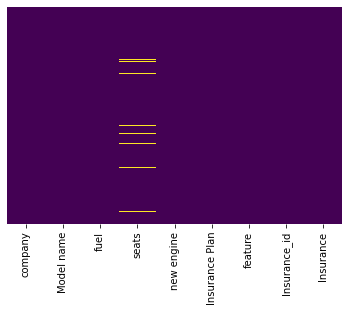

In [6]:
sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         7492 non-null   object 
 1   Model name      7492 non-null   object 
 2   fuel            7492 non-null   object 
 3   seats           7279 non-null   float64
 4   new engine      7492 non-null   int64  
 5   Insurance Plan  7492 non-null   object 
 6   feature         7492 non-null   object 
 7   Insurance_id    7492 non-null   int64  
 8   Insurance       7492 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 526.9+ KB


In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         7492 non-null   object 
 1   Model name      7492 non-null   object 
 2   fuel            7492 non-null   object 
 3   seats           7279 non-null   float64
 4   new engine      7492 non-null   int64  
 5   Insurance Plan  7492 non-null   object 
 6   feature         7492 non-null   object 
 7   Insurance_id    7492 non-null   int64  
 8   Insurance       7492 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 526.9+ KB


In [9]:
raw.dropna(inplace=True)

In [10]:
raw.head()

,company,Model name,fuel,seats,new engine,Insurance Plan,feature,Insurance_id,Insurance
0,Maruti,Maruti Swift Dzire VDI,Diesel,5.0,1248,"Comapany Name:ICICI Lombord,Policy Plan:2000000",maruti maruti swift dzire vdi 5.0 1248,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
1,Honda,Honda City 2017-2020 EXi,Petrol,5.0,1497,"Comapany Name:ICICI Lombord,Policy Plan:2000000",honda honda city 2017-2020 exi 5.0 1497,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
2,Hyundai,Hyundai i20 Sportz Diesel,Diesel,5.0,1396,"Comapany Name:ICICI Lombord,Policy Plan:2000000",hyundai hyundai i20 sportz diesel 5.0 1396,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
3,Maruti,Maruti Swift VXI BSIII,Petrol,5.0,1298,"Comapany Name:ICICI Lombord,Policy Plan:2000000",maruti maruti swift vxi bsiii 5.0 1298,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"
4,Hyundai,Hyundai Xcent 1.2 VTVT E Plus,Petrol,5.0,1197,"Comapany Name:ICICI Lombord,Policy Plan:2000000",hyundai hyundai xcent 1.2 vtvt e plus 5.0 1197,11,"Comapany Name:ICICI Lombord,Policy Plan:2000000"


In [11]:
raw['company'] = raw['company'].apply(lambda x:x.lower())
raw['Model name'] = raw['Model name'].apply(lambda x:x.lower())
raw['fuel'] = raw['fuel'].apply(lambda x:x.lower())

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(max_features=7000,stop_words='english')

In [14]:
vectors=cv.fit_transform(raw['feature']).toarray()

In [15]:
vectors.shape

(7279, 740)

In [16]:
from sklearn.metrics.pairwise import cosine_similarity


In [17]:
similarity=cosine_similarity(vectors)

In [25]:
def recommand():
    print(raw['company'].unique())
    obj1=input("Enter company:").lower()
    print(raw[raw['company']==obj1]['Model name'].unique())
    obj2=input("Enter Model Name:").lower()
    print(raw[raw['Model name']==obj2]['fuel'].unique())
    obj3=input("Enter Fuel Type:").lower()
    print(raw[raw['Model name']==obj2]['new engine'].unique())
    obj4=int(input("Enter engine:"))
    car_index=raw[(raw['company']==obj1) & (raw['Model name']==obj2)&(raw['fuel']==obj3)&(raw['new engine']==obj4)].index[0]
    k=similarity[car_index]
    lst=sorted(list(enumerate(k)),reverse=True,key=lambda x:x[1])[1:]
    lst1 = list(enumerate(raw['Insurance'].values.tolist()))
    lst2= []
    for i in lst:
        for j in lst1:
            if i[0]==j[0]:
                if j[1] not in lst2:
                    lst2.append(j[1])
  
    
    print("Your Insurance Plans")
    for i in lst2[0:5]:
        print(i)
    print("If you want more options I can Help You.Please Enter Y for More plans and N  for stop.")
    a = input("Enter Your choice:").lower()
    if a=='y':
        for i in lst2[5:10]:
            print(i)
    else:
        print("Thank you")


In [27]:
recommand()

['maruti' 'honda' 'hyundai' 'toyota' 'ford' 'renault' 'mahindra' 'tata'
 'mercedes-benz' 'audi' 'volkswagen' 'bmw' 'jaguar' 'land' 'volvo']
Enter company:volkswagen
['volkswagen ameo 1.5 tdi highline 16 alloy'
 'volkswagen ameo 1.5 tdi comfortline' 'volkswagen vento diesel highline'
 'volkswagen polo 1.2 mpi comfortline' 'volkswagen vento petrol highline'
 'volkswagen passat 1.8 tsi mt' 'volkswagen ameo 1.0 mpi trendline'
 'volkswagen ameo 1.2 mpi comfortline plus' 'volkswagen gti 1.8 tsi'
 'volkswagen polo 1.5 tdi highline' 'volkswagen vento diesel trendline'
 'volkswagen polo 1.5 tdi comfortline'
 'volkswagen polo diesel highline 1.2l'
 'volkswagen polo diesel trendline 1.2l'
 'volkswagen vento diesel comfortline'
 'volkswagen polo diesel comfortline 1.2l' 'volkswagen vento 1.6 highline'
 'volkswagen jetta 2.0l tdi highline at'
 'volkswagen vento 1.5 tdi highline at'
 'volkswagen polo 2015-2019 1.0 mpi highline plus'
 'volkswagen polo petrol comfortline 1.2l'
 'volkswagen jetta 1.6 t

ValueError: invalid literal for int() with base 10: "'999'"

In [23]:
raw['new engine']=raw['new engine'].astype(str)

In [24]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279 entries, 0 to 7491
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         7279 non-null   object 
 1   Model name      7279 non-null   object 
 2   fuel            7279 non-null   object 
 3   seats           7279 non-null   float64
 4   new engine      7279 non-null   object 
 5   Insurance Plan  7279 non-null   object 
 6   feature         7279 non-null   object 
 7   Insurance_id    7279 non-null   int64  
 8   Insurance       7279 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 568.7+ KB
